In [8]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [9]:
iris = pd.read_csv('./r1_pointMapCluster/part-00000-85c0a1e8-d17b-4761-a921-394c0c3d8273-c000.csv')
iris

,cluster_index,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,0,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [42]:
pca_iris = PCA(n_components=2)
pcaComponent_iris = pca_iris.fit_transform(iris.iloc[:, 1:].values)
labels = iris.iloc[:, 0]

pcaComponent_iris_DF = pd.DataFrame(data = pcaComponent_iris, columns = ['pc1', 'pc2'])

In [43]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: cluster_index, Length: 150, dtype: int64

In [44]:
pcaComponent_iris_DF.tail()

,pc1,pc2
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877
149,1.389666,-0.282887


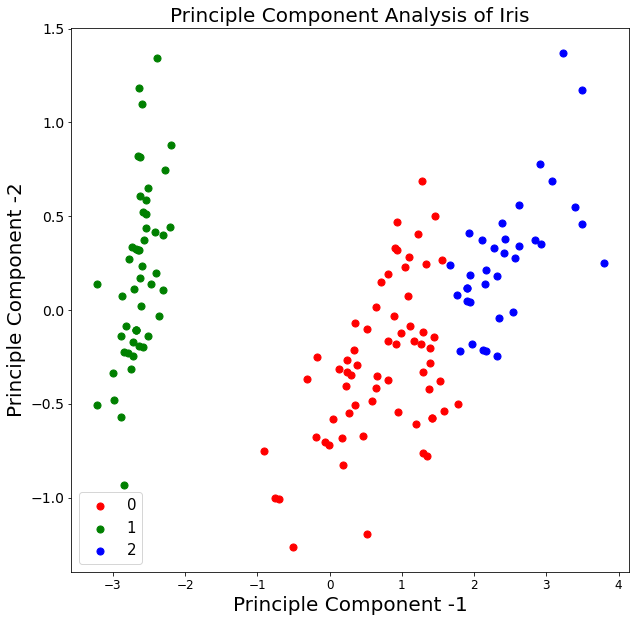

In [50]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principle Component -1', fontsize=20)
plt.ylabel('Principle Component -2', fontsize=20)
plt.title("Principle Component Analysis of Iris", fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = iris['cluster_index'] == target
    plt.scatter(pcaComponent_iris_DF.loc[indicesToKeep, 'pc1'],
               pcaComponent_iris_DF.loc[indicesToKeep, 'pc2'],
               c= color,
               s = 50)
plt.legend(targets, prop={'size':15})